In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
import warnings 
warnings.filterwarnings('ignore')

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()

In [21]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
pd.set_option('max_columns', None)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


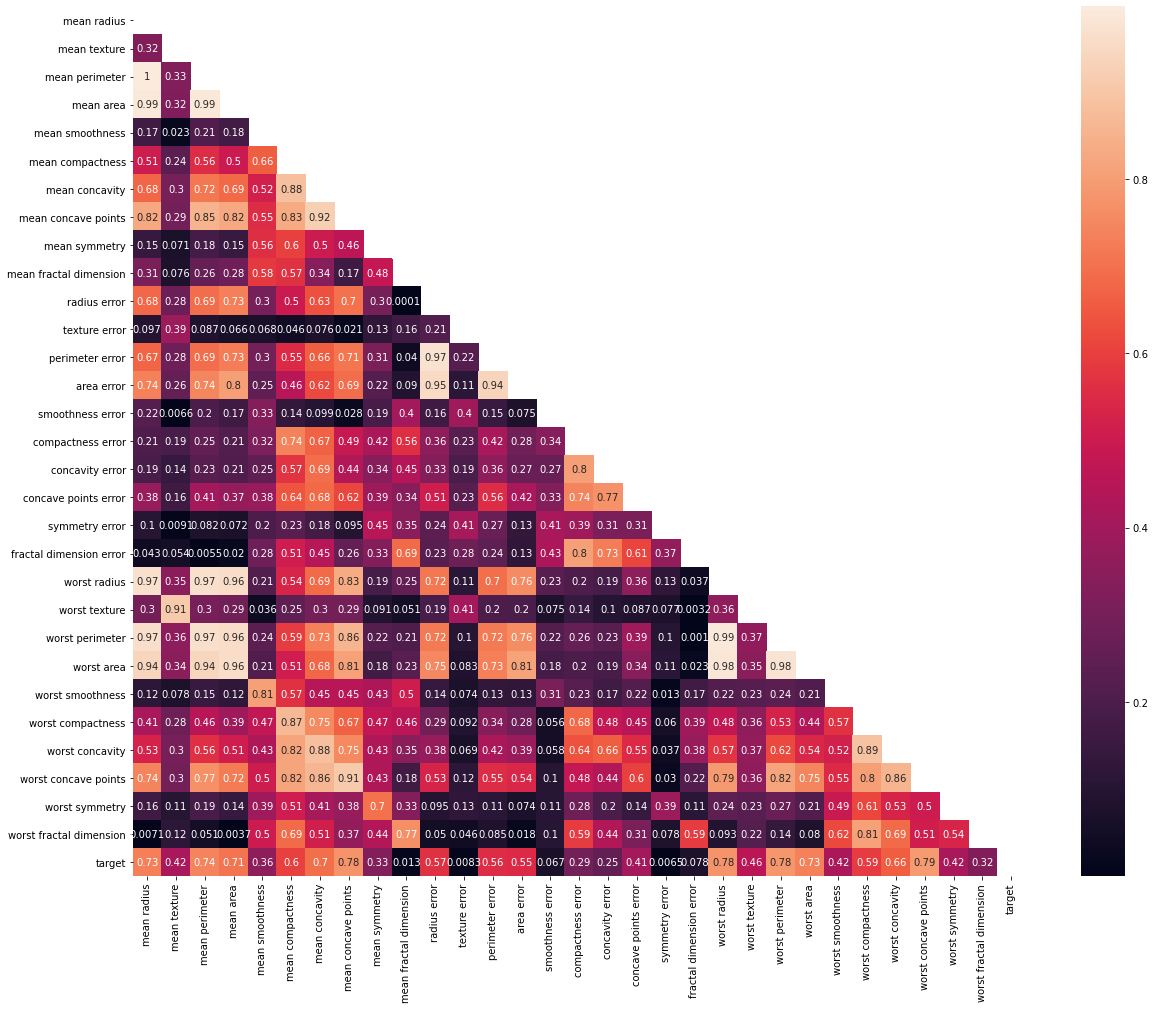

In [42]:
fig = plt.figure(figsize=(20,16))
sns.heatmap(abs(df.corr()), annot=True, mask=np.triu(df.corr()))
plt.show()

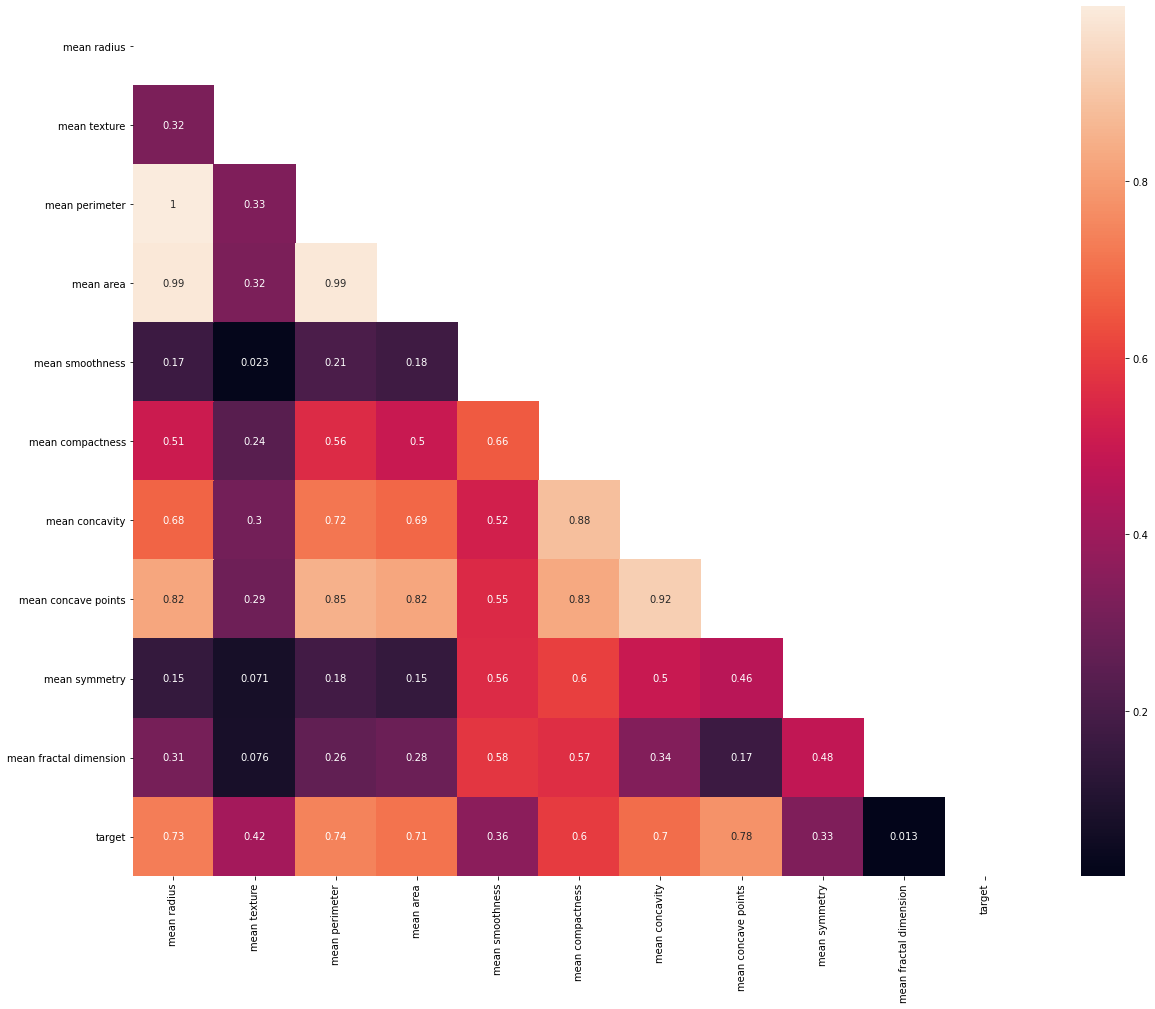

In [46]:
cols_to_keep = [col for col in df.columns if col[:4] == 'mean' or col == 'target']

fig = plt.figure(figsize=(20,16))
sns.heatmap(abs(df[cols_to_keep].corr()), annot=True, mask=np.triu(df[cols_to_keep].corr()))
plt.show()

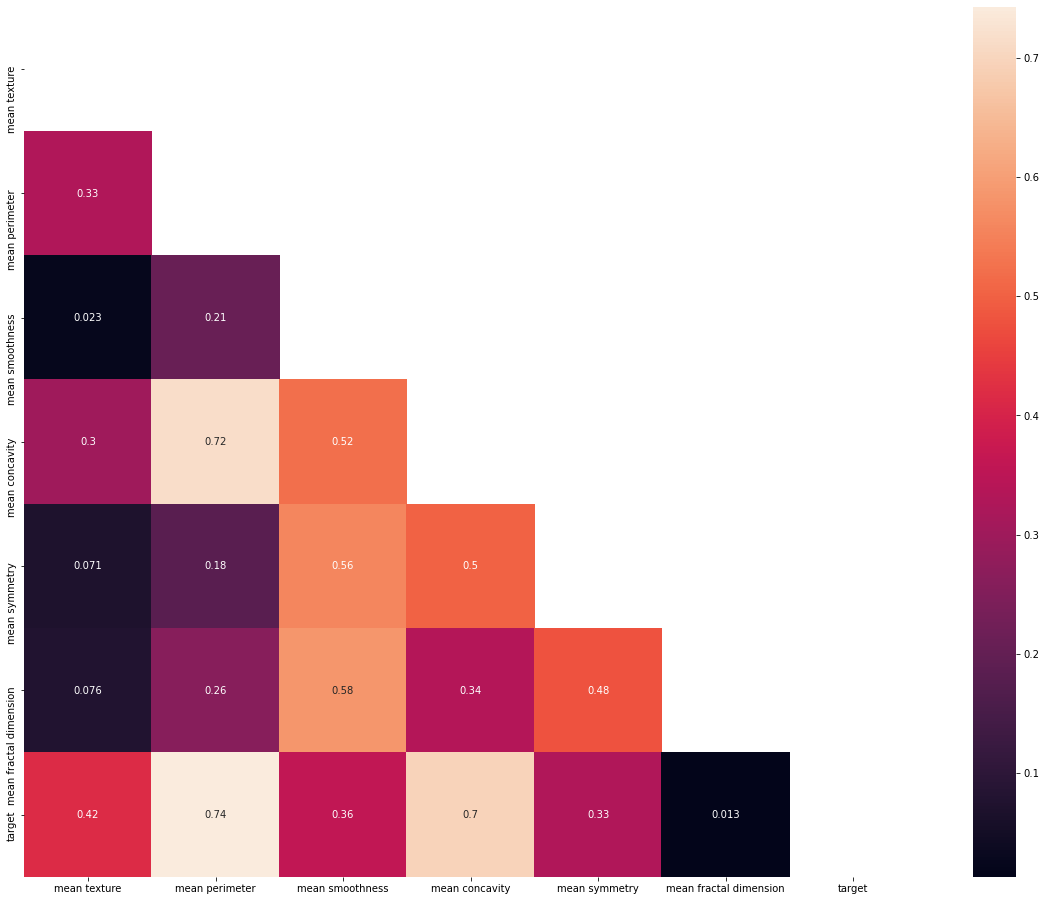

In [48]:
cols_to_drop = ['mean concave points', 'mean area', 'mean radius', 'mean compactness']
fig = plt.figure(figsize=(20,16))
sns.heatmap(abs(df[cols_to_keep].drop(cols_to_drop, axis=1).corr()), annot=True, mask=np.triu(df[cols_to_keep].drop(cols_to_drop, axis=1).corr()))
plt.show()

In [49]:
filtered_df = df[cols_to_keep].drop(cols_to_drop, axis=1)
filtered_df.head()

,mean texture,mean perimeter,mean smoothness,mean concavity,mean symmetry,mean fractal dimension,target
0,10.38,122.80,0.11840,0.3001,0.2419,0.07871,0
1,17.77,132.90,0.08474,0.0869,0.1812,0.05667,0
2,21.25,130.00,0.10960,0.1974,0.2069,0.05999,0
3,20.38,77.58,0.14250,0.2414,0.2597,0.09744,0
4,14.34,135.10,0.10030,0.1980,0.1809,0.05883,0


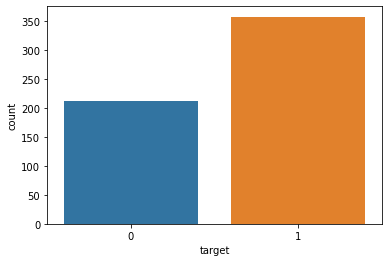

In [53]:
sns.countplot(filtered_df.target)
plt.show()

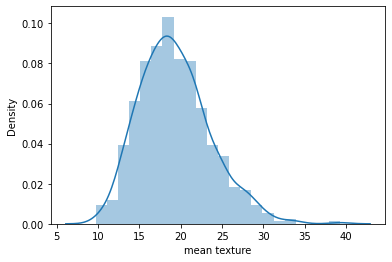

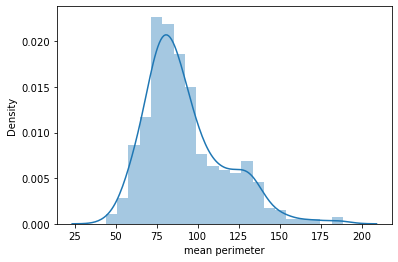

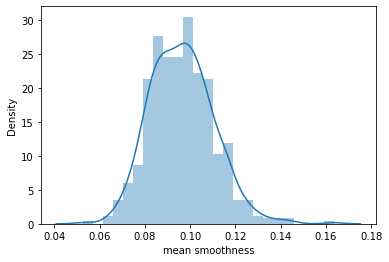

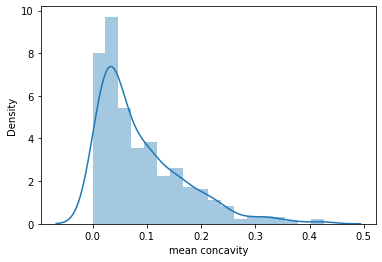

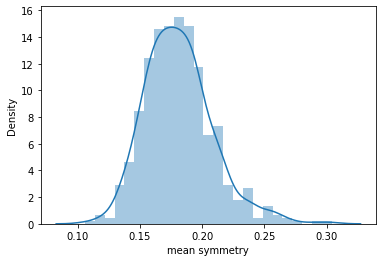

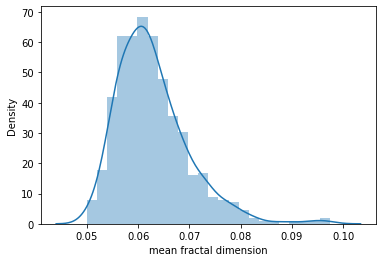

In [56]:
feature_names = filtered_df.drop('target', axis=1).columns
for feature in feature_names:
    sns.distplot(filtered_df[feature])
    plt.show()

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filtered_df[feature_names], filtered_df.target, random_state=123, test_size=0.25)

In [70]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()

In [71]:
gaussian_model.fit(x_train, y_train)

GaussianNB()

In [72]:
from sklearn.metrics import plot_roc_curve

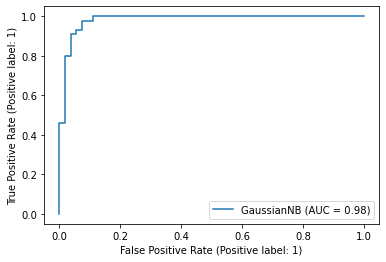

In [74]:
plot_roc_curve(gaussian_model, x_test, y_test)
plt.show()